<a href="https://colab.research.google.com/github/kushalnavghare/DSC-478_PRG_ML_APP/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### env setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pwd

'/content'

In [4]:

%cd drive/MyDrive/DSC-478_PRG_ML_APPS/

[Errno 2] No such file or directory: 'drive/MyDrive/DSC-478_PRG_ML_APPS/'
/content/drive/MyDrive/DSC-478_PRG_ML_APPS


In [5]:
# import libs
import pandas as pd
import numpy as np

In [6]:
pd.set_option('display.max_columns', 101)

In [7]:
import matplotlib.pyplot as plt

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
import warnings
warnings.filterwarnings(action='ignore')

In [9]:
RANDOM_STATE = 33

For this assignment you will experiment with various regression approaches and you'll get your feet wet with some clustering. We will rely on subsets of some real-world data sets and on tools from the Scikit-learn machine learning package for Python as well as modules based on the textbook code (Machine Learning in Action).

# 1. Regression Analysis [Dataset: communities.zip]

For this problem you will experiment with multiple linear regression models to make predictions with numerical data. You will also explore more systematic methods for feature selection and for optimizing model parameters (model selection). The data set you will use is a subset of the "Communities and Crime" data set that combines information from the 1990 census data as well as FBI crime data from 1995. Please read the full description of the data, including the description and statistics on different variables. The target attribute for regression purposes is "ViolentCrimesPerPop". Note: The two identifier attributes "state" and "community name" should be excluded for the regression task.

Your tasks in this problem are the following.

## a.
Load and preprocess the data using Pandas and remove the unneeded attributes. For the purpose of this assignment you do not need to normalize or standardize the data unless explicitly required in one of the following tasks. However, you may need to handle missing values by imputing those values based on variable means. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for the variables in the data set. Separate the target attribute for regression. Use scikit-learn's train_test_split function to create a 20%-80% randomized split of the data (important note: for reporducible output across multiple runs, please use "random_state = 33"). Set aside the 20% test portion; the 80% training data partition will be used for cross-validation on various tasks specified below.

In [10]:
# read data
raw_communities = pd.read_csv('data/communities.csv')

In [11]:
raw_communities.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.22,0.27,0.20,0.21,0.51,0.91,0.91,0.89,0.85,0.40,0.60,0.00,0.06,0.00,0.03,0.07,0.20,0.27,0.01,0.02,0.04,0.05,0.88,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [12]:
# unique level of data check
raw_communities[['state', 'communityname']].value_counts()

state  communityname   
1      Alabastercity       1
39     Lebanoncity         1
       Miamitownship       1
       Miamisburgcity      1
       Mentorcity          1
                          ..
19     Newtoncity          1
       MasonCitycity       1
       Marshalltowncity    1
       Indianolacity       1
56     Sheridancity        1
Length: 1994, dtype: int64

In [13]:
# null check
((raw_communities.isna().sum())>0).value_counts()

False    100
dtype: int64

No null values in the dataset

In [18]:
raw_communities.dtypes.reset_index().groupby(0).agg({'index':'unique'}).reset_index()

,0,index
0,int64,[state]
1,float64,"[population, householdsize, racepctblack, race..."
2,object,"[communityname, OtherPerCap]"


In [20]:
(raw_communities == "?").values.nonzero()

(array([], dtype=int64), array([], dtype=int64))

In [17]:
raw_communities = raw_communities.replace('?', np.nan)

In [21]:
# convert object to float
raw_communities['OtherPerCap'] = raw_communities['OtherPerCap'].astype(float)

In [24]:
raw_communities = raw_communities.fillna(raw_communities.mean())

In [27]:
(raw_communities.isna().sum()).value_counts()

0    100
dtype: int64

In [28]:
raw_communities.describe()

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,0.064072,0.696269,0.361123,0.558154,0.291570,0.495687,0.471133,0.317778,0.479248,0.375677,0.350251,0.368049,0.291098,0.203506,0.322357,0.284742,0.386279,0.055507,0.303024,0.315807,0.383330,0.361675,0.363531,0.501073,0.396384,0.440597,0.461244,0.434453,0.487568,0.494273,0.487748,0.610918,0.620657,0.664032,0.582884,0.501449,0.526690,0.036294,0.249995,0.030060,0.320211,0.360622,0.399077,0.427879,0.181364,0.182126,0.184774,0.182879,0.785903,0.150587,0.267608,0.251891,0.462101,0.494428,0.404097,0.562598,0.186264,0.495186,0.314694,0.076815,0.719549,0.548686,0.204529,0.433335,0.494178,0.264478,0.243059,0.264689,0.263490,0.268942,0.346379,0.372457,0.422964,0.384102,0.490125,0.449754,0.403816,0.029438,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,0.128256,0.444811,0.209362,0.182913,0.204108,0.178071,0.173619,0.222137,0.167564,0.198257,0.191109,0.186804,0.171593,0.164775,0.195411,0.190960,0.183081,0.127941,0.228474,0.213360,0.202508,0.209193,0.202171,0.174036,0.202386,0.175457,0.182460,0.175437,0.175170,0.183607,0.154594,0.201976,0.206353,0.218749,0.191507,0.168612,0.175241,0.108671,0.229946,0.087189,0.219088,0.210924,0.201498,0.194970,0.235792,0.236333,0.236739,0.234822,0.226869,0.219716,0.196567,0.190709,0.169551,0.157924,0.189301,

In [29]:
# dep vs indep vars
X = raw_communities.drop(["state",	"communityname", "ViolentCrimesPerPop"], axis=1)
y = raw_communities['ViolentCrimesPerPop']

In [30]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, test_size=.20)

In [31]:
X_test.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
1158,0.00,0.46,0.01,0.97,0.09,0.04,0.40,0.26,0.20,0.49,0.02,1.00,1.00,0.55,1.00,0.88,0.42,0.09,0.46,1.00,1.00,1.00,1.00,0.81,0.71,0.24,1.00,0.00,0.07,0.04,0.04,0.97,0.16,0.38,0.20,0.64,0.24,0.21,0.20,0.22,0.37,0.97,0.95,0.97,0.91,0.25,0.00,0.00,0.02,0.00,0.45,0.45,0.51,0.46,0.19,0.17,0.17,0.15,0.89,0.06,0.16,0.19,0.51,0.48,0.45,0.99,0.01,0.00,1.0,0.02,0.63,0.99,0.09,0.47,0.67,0.00,0.00,0.85,1.00,1.00,0.78,1.00,1.00,1.00,0.46,0.44,0.22,0.00,0.00,0.18,0.13,0.73,0.76,0.55,0.04,0.06,0.03
1079,0.01,0.35,0.01,0.96,0.04,0.04,0.32,0.45,0.29,0.62,0.02,0.94,0.30,0.45,0.10,0.39,0.62,0.38,0.38,0.34,0.32,0.32,0.21,0.08,0.05,0.17,0.22,0.01,0.24,0.44,0.58,0.20,0.41,0.48,0.58,0.32,0.45,0.40,0.45,0.47,0.39,0.53,0.58,0.61,0.59,0.64,0.63,0.01,0.25,0.00,0.07,0.12,0.25,0.30,0.02,0.03,0.05,0.06,0.78,0.08,0.14,0.13,0.36,0.42,0.34,0.43,0.07,0.56,0.0,0.04,0.53,0.42,0.13,0.70,0.25,0.18,0.41,0.31,0.30,0.29,0.23,0.32,0.35,0.31,0.34,0.46,0.58,0.00,0.00,0.11,0.86,0.66,0.88,0.80,0.03,0.11,0.01
1633,0.51,0.31,0.60,0.46,0.06,0.09,0.42,0.54,0.39,0.48,0.52,1.00,0.11,0.28,0.15,0.34,0.57,0.92,0.53,0.15,0.18,0.22,0.20,0.13,0.23,0.15,0.19,0.74,0.68,0.43,0.57,0.24,0.80,0.27,0.36,0.63,0.60,0.74,0.59,0.62,0.45,0.12,0.21,0.19,0.13,0.31,0.29,0.62,0.85,0.10,0.33,0.32,0.34,0.34,0.11,0.09,0.09,0.08,0.80,0.12,0.27,0.20,0.31,0.41,0.29,0.31,0.10,0.49,0.5,0.83,0.58,0.29,0.87,0.66,0.00,0.54,0.30,0.06,0.06,0.08,0.14,0.16,0.18,0.20,0.81,0.24,0.57,0.17,0.01,0.13,0.80,0.61,0.87,0.84,0.12,0.68,0.75
1700,0.02,0.52,0.25,0.63,0.03,0.31,0.54,0.62,0.44,0.36,0.00,0.00,0.26,0.60,0.71,0.34,0.43,0.37,0.26,0.27,0.31,0.37,0.12,0.16,0.30,0.25,0.27,0.03,0.46,0.46,0.54,0.29,0.35,0.47,0.49,0.27,0.56,0.41,0.60,0.60,0.53,0.57,0.49,0.53,0.52,0.59,0.59,0.02,0.37,0.01,0.50,0.76,0.77,0.81,0.16,0.21,0.19,0.19,0.74,0.22,0.38,0.35,0.48,0.47,0.51,0.43,0.34,0.59,0.0,0.05,0.54,0.45,0.32,0.49,0.67,0.82,0.67,0.09,0.13,0.17,0.28,0.29,0.29,0.30,0.56,0.63,0.56,0.01,0.00,0.13,0.72,0.35,0.50,0.70,0.13,0.04,0.01
1956,0.03,0.37,0.40,0.68,0.03,0.01,0.39,0.47,0.34,0.55,0.04,1.00,0.23,0.52,0.17,0.36,0.56,0.35,0.44,0.27,0.28,0.32,0.19,0.17,0.29,0.24,0.17,0.03,0.31,0.47,0.59,0.22,0.22,0.52,0.64,0.25,0.60,0.37,0.52,0.57,0.38,0.49,0.46,0.54,0.62,0.64,0.73,0.03,0.42,0.00,0.46,0.68,0.59,0.57,0.04,0.05,0.04,0.04,0.97,0.03,0.17,0.16,0.37,0.37,0.38,0.53,0.15,0.58,0.0,0.04,0.73,0.53,0.27,0.59,0.40,0.31,0.12,0.09,0.10,0.13,0.16,0.21,0.23,0.24,0.30,0.38,0.42,0.01,0.01,0.03,0.78,0.59,0.71,0.69,0.06,0.10,0.00


## b.
Perform standard multiple linear regression on data using the scikit-learn Linear Regression module. Compute the RMSE values on the full training data (the 80% partition). Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights) and plot them using matplotlib. Finally, perform 10-fold cross-validation on the training partition and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection).

In [33]:
# initiate model
lin_model = LinearRegression()

In [34]:
# fit model on train
lin_model.fit(X_train, y_train)

LinearRegression()

In [37]:
# predict
train_preds = lin_model.predict(X_train)
test_preds = lin_model.predict(X_test)

In [38]:
print("RMSE:Train")
print(np.sqrt(mean_squared_error(y_train, train_preds)))

RMSE:Train
0.1261959313342669


In [50]:
# get model attr
lin_intercept = lin_model.intercept_
lin_coefficient = lin_model.coef_[0]

In [56]:
x = np.linspace(min(train_preds), max(train_preds), 100)

In [57]:
y = lin_intercept + lin_coefficient * x

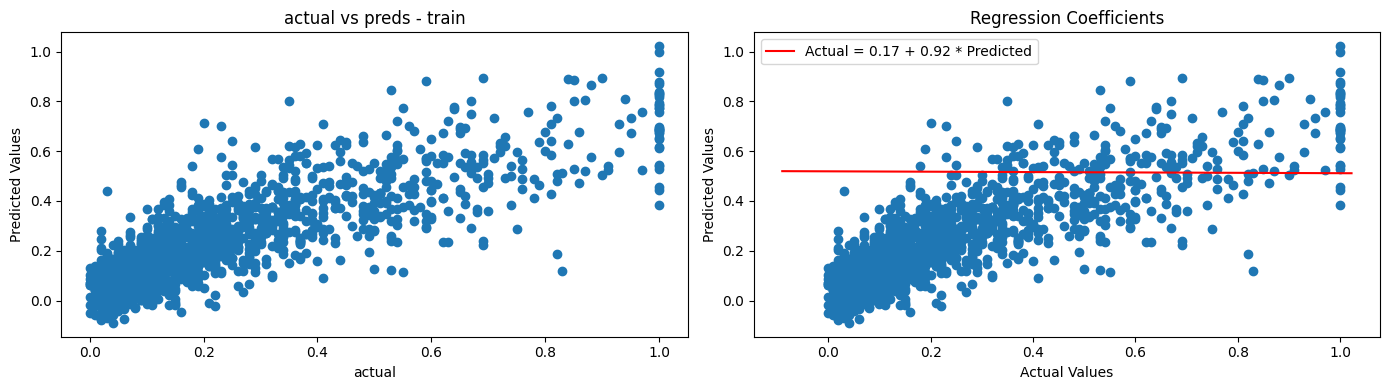

In [58]:
# correlation

plt.figure(figsize=(14, 4))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.scatter(y_train, train_preds)
ax1.set_xlabel("actual")
ax1.set_ylabel('Predicted Values')
ax1.set_title('actual vs preds - train')


# ax2.subplot(102)
ax2.plot(x, y, color='red', label=f'Actual = {intercept:.2f} + {coefficient:.2f} * Predicted')
ax2.scatter(y_train, train_preds)
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted Values')
ax2.set_title('Regression Coefficients')
ax2.legend()


# ax2.grid(True)
# ax2.show()

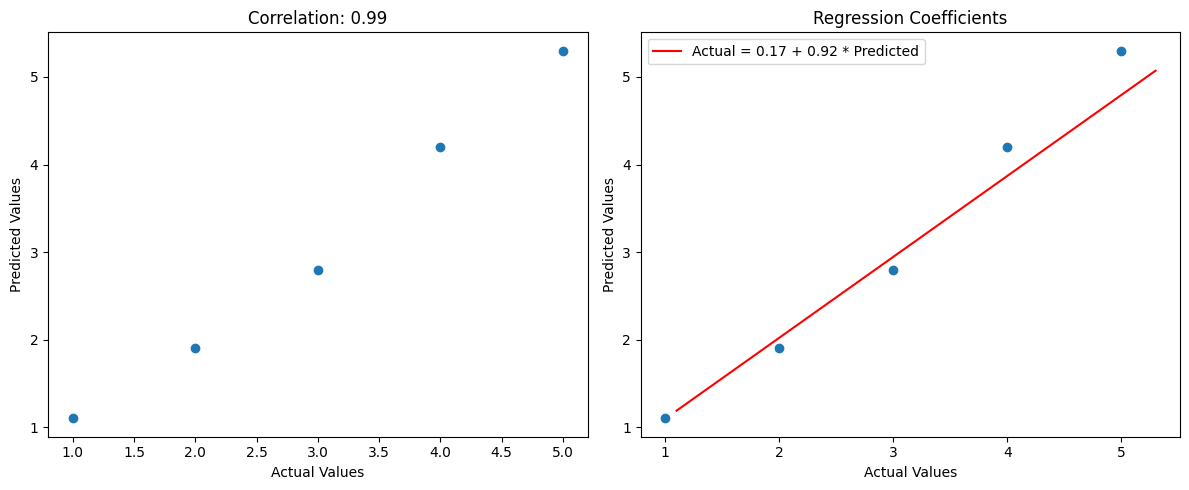

In [51]:

data = {'Actual': [1, 2, 3, 4, 5],
        'Predicted': [1.1, 1.9, 2.8, 4.2, 5.3]}
df = pd.DataFrame(data)

# Create and fit a linear regression model
X = df['Predicted'].values.reshape(-1, 1)
y = df['Actual'].values
regression_model = LinearRegression()
regression_model.fit(X, y)

# Get the regression coefficients
intercept = regression_model.intercept_
coefficient = regression_model.coef_[0]

# Calculate the correlation between Actual and Predicted values
correlation = df['Actual'].corr(df['Predicted'])

# Plot the correlation and regression coefficients
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for correlation
ax1.scatter(df['Actual'], df['Predicted'])
ax1.set_xlabel('Actual Values')
ax1.set_ylabel('Predicted Values')
ax1.set_title(f'Correlation: {correlation:.2f}')

# Plot the regression coefficients
x = np.linspace(min(df['Predicted']), max(df['Predicted']), 100)
y = intercept + coefficient * x
ax2.plot(x, y, color='red', label=f'Actual = {intercept:.2f} + {coefficient:.2f} * Predicted')
ax2.scatter(df['Actual'], df['Predicted'])
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted Values')
ax2.set_title('Regression Coefficients')
ax2.legend()

plt.tight_layout()
plt.show()
